In [66]:
### 深度图像的后处理 ###
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
import cv2
print("Environment Ready")

Environment Ready


In [67]:
#===独立数据 = 处理环节===#    
depth_scale = 0.0010000000474974513 
clipping_distance_in_meters = 2       #1 meter
clipping_distance = clipping_distance_in_meters / depth_scale

Seq_num = 2
#图像路径
Image_path= ["./Image_NPY/NPY_color_depth/", "./Image_NPY/NPY_Infrared/",  
         "./Image_IMG/IMG_color_depth/", "./Image_IMG/IMG_Infrared/"] 

color_image_npy = np.load(file = Image_path[0] +'color_'+ str(Seq_num).zfill(6) +'.npy')
deep_image_npy = np.load(file = Image_path[0] +'depth_'+ str(Seq_num).zfill(6) +'.npy')
deep_image_npy_cMAP = cv2.applyColorMap(cv2.convertScaleAbs(deep_image_npy, alpha=0.03), cv2.COLORMAP_JET)


In [68]:
'''
###===过滤器===###
#抽取过滤器
decimation = rs.decimation_filter()
decimation.set_option(rs.option.filter_magnitude, 4)   # 设置过滤幅值
#空间过滤器
spatial = rs.spatial_filter()
spatial.set_option(rs.option.filter_magnitude, 5)
spatial.set_option(rs.option.filter_smooth_alpha, 1)
spatial.set_option(rs.option.filter_smooth_delta, 50)
spatial.set_option(rs.option.holes_fill, 3)
#时间过滤器
temporal = rs.temporal_filter()
#孔填充过滤器
hole_filling = rs.hole_filling_filter()

# Putting Everything Together
# These filters work best when applied sequentially one after another.
depth_to_disparity = rs.disparity_transform(True)  
disparity_to_depth = rs.disparity_transform(False) 

for x in range(10): 
    frame = frames[x] 
    frame = decimation.process(frame) 
    frame = depth_to_disparity.process(frame) 
    frame = spatial.process(frame) 
    frame = temporal.process(frame) 
    frame = disparity_to_depth.process(frame)
    frame = hole_filling.process(frame)

colorized_depth = np.asanyarray(colorizer.colorize(frame).get_data())
plt.imshow(colorized_depth)
'''

'\n###===过滤器===###\n#抽取过滤器\ndecimation = rs.decimation_filter()\ndecimation.set_option(rs.option.filter_magnitude, 4)   # 设置过滤幅值\n#空间过滤器\nspatial = rs.spatial_filter()\nspatial.set_option(rs.option.filter_magnitude, 5)\nspatial.set_option(rs.option.filter_smooth_alpha, 1)\nspatial.set_option(rs.option.filter_smooth_delta, 50)\nspatial.set_option(rs.option.holes_fill, 3)\n#时间过滤器\ntemporal = rs.temporal_filter()\n#孔填充过滤器\nhole_filling = rs.hole_filling_filter()\n\n# Putting Everything Together\n# These filters work best when applied sequentially one after another.\ndepth_to_disparity = rs.disparity_transform(True)  \ndisparity_to_depth = rs.disparity_transform(False) \n\nfor x in range(10): \n    frame = frames[x] \n    frame = decimation.process(frame) \n    frame = depth_to_disparity.process(frame) \n    frame = spatial.process(frame) \n    frame = temporal.process(frame) \n    frame = disparity_to_depth.process(frame)\n    frame = hole_filling.process(frame)\n\ncolorized_depth = np.as

In [69]:
###===深度图像黑洞处理===###
def Func_deep_frame_hole_filling(frame):
    ###===过滤器===###
    #抽取过滤器
    decimation = rs.decimation_filter()
    decimation.set_option(rs.option.filter_magnitude, 4)   # 设置过滤幅值
    #空间过滤器
    spatial = rs.spatial_filter()
    spatial.set_option(rs.option.filter_magnitude, 5)
    spatial.set_option(rs.option.filter_smooth_alpha, 1)
    spatial.set_option(rs.option.filter_smooth_delta, 50)
    spatial.set_option(rs.option.holes_fill, 3)
    #时间过滤器
    temporal = rs.temporal_filter()
    #孔填充过滤器
    hole_filling = rs.hole_filling_filter()

    ###===处理过程===###
    # Putting Everything Together
    # These filters work best when applied sequentially one after another.
    depth_to_disparity = rs.disparity_transform(True)  
    disparity_to_depth = rs.disparity_transform(False) 

    frame = decimation.process(frame)  #抽取过滤器
    frame = depth_to_disparity.process(frame)   #视差转换
    frame = spatial.process(frame)   #空间过滤器
    frame = temporal.process(frame)     #时间过滤器
    frame = disparity_to_depth.process(frame)   #视差转换
    frame = hole_filling.process(frame)    #孔洞填充
    return frame

In [70]:
###===深度图像黑洞处理===###
class Class_deep_frame_hole_filling():
    def __init__(self):
        ###===过滤器===###
        #抽取过滤器   
        self.decimation = rs.decimation_filter()  
        self.decimation.set_option(rs.option.filter_magnitude, 4)   # 设置过滤幅值
        #空间过滤器    
        self.spatial = rs.spatial_filter()
        self.spatial.set_option(rs.option.filter_magnitude, 5)
        self.spatial.set_option(rs.option.filter_smooth_alpha, 1)
        self.spatial.set_option(rs.option.filter_smooth_delta, 50)
        self.spatial.set_option(rs.option.holes_fill, 3)
        #时间过滤器
        self.temporal = rs.temporal_filter()
        #孔填充过滤器
        self.hole_filling = rs.hole_filling_filter() 
        # Putting Everything Together
        # These filters work best when applied sequentially one after another.
        self.depth_to_disparity = rs.disparity_transform(True)  
        self.disparity_to_depth = rs.disparity_transform(False) 
    def all_filters_deal(self, frame):
        ###===处理过程===###
        frame = self.decimation.process(frame)  #抽取过滤器
        frame = self.depth_to_disparity.process(frame)   #视差转换
        frame = self.spatial.process(frame)   #空间过滤器
        frame = self.temporal.process(frame)     #时间过滤器
        frame = self.disparity_to_depth.process(frame)   #视差转换
        frame = self.hole_filling.process(frame)    #孔洞填充
        return frame

In [71]:
###===采集===###

# Setup:
pipe = rs.pipeline()
cfg = rs.config()
#cfg.enable_device_from_file("stairs.bag")
#cfg.enable_device('838212073161')
cfg.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
cfg.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


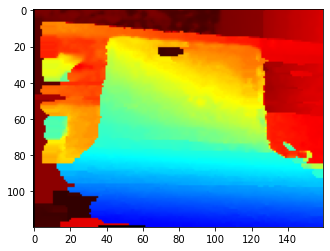

In [72]:
###===类实现===###
FillingHole = Class_deep_frame_hole_filling() 
depth_frame1 = FillingHole.all_filters_deal(depth_frame)  
colorizer = rs.colorizer() 
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame1).get_data()) 

plt.rcParams["axes.grid"] = False 
plt.rcParams['figure.figsize'] = [8, 4] 
plt.imshow(colorized_depth) 

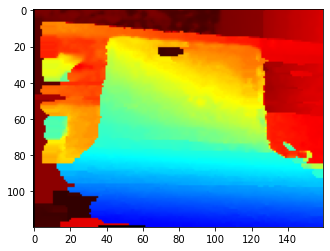

In [73]:
###===函数实现===###
depth_frame1 = Func_deep_frame_hole_filling(depth_frame)
colorizer = rs.colorizer() 
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame1).get_data()) 

plt.rcParams["axes.grid"] = False 
plt.rcParams['figure.figsize'] = [8, 4] 
plt.imshow(colorized_depth) 